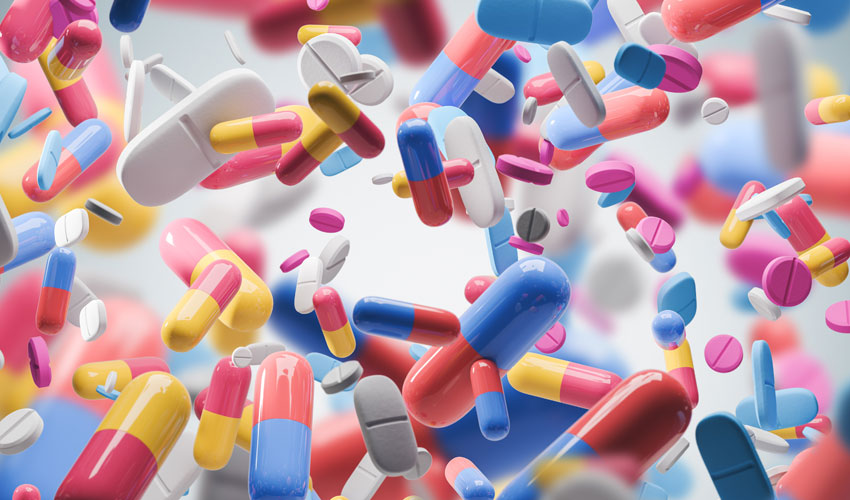

* [Load and Check Data](#1)<br><br>
* [EDA](#2)
* [Data Preperation](#3)
* [Classification](#4)
  * [KNN](#5)
  * [KNN GridSearch](#6)
  * [Random Forest](#7)
  * [Random Forest GridSearch](#8)
  * [SVC](#9)
  * [SVC GridSearch](#10)
  * [AdaBoost](#11)
 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id='1'></a>
# Load and Check Data

In [ ]:
dataset=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

In [ ]:
print(dataset.info())

<a id='2'></a>
# EDA

In [ ]:
sns.distplot(dataset['Age'],kde=True,bins=10)
plt.show()

In [ ]:
sns.distplot(dataset['Na_to_K'],kde=True,bins=10)
plt.show()

In [ ]:
sns.countplot(x='Sex',data=dataset)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.stripplot(x='BP',y='Age',data=dataset,hue='Drug',jitter=True,dodge=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.pairplot(dataset,kind = "scatter",hue = "Drug")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=dataset,x='Drug',y='Age',hue='Sex',palette='PRGn')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset,x='BP',hue='Drug')
plt.show()

<a id='3'></a>
# Data Preperation

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Drug']=le.fit_transform(dataset['Drug'])
dataset=pd.get_dummies(dataset)


In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['Drug'],axis=1)
y = dataset.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)



<a id='5'></a>
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

<a id='6'></a>
# KNN GridSearch

In [ ]:
grid={'n_neighbors':np.arange(1,100),
       'p':np.arange(1,5),
       'weights':['uniform','distance']
      }
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)
print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

<a id='7'></a>
# Random Forest

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
accuracies=cross_val_score(rfc,x_train,y_train,cv=5)
rfc.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',rfc.score(x_test,y_test))

<a id='8'></a>
# Random Forest GridSearch

In [ ]:
grid = {'n_estimators':np.arange(10,1000,10),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

 <a id='9'></a>
 # Linear SVC

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing  import StandardScaler 
from sklearn.svm import LinearSVC
svm_clf=Pipeline((
   ('scaler',StandardScaler()),
   ('linear_svc',LinearSVC(C=1,loss='hinge')), 
))
accuracies=cross_val_score(svm_clf,x_train,y_train,cv=5)
svm_clf.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',svm_clf.score(x_test,y_test))

<a id='10'></a>
# SVC GridSearch

In [ ]:
from sklearn.svm import SVC
grid = {
    'C':[0.01,0.1,1,10,100],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,2,3,4,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))


<a id='11'></a>
# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5) 
ada_clf.fit(x_train, y_train)
accuracies=cross_val_score(ada_clf,x_train,y_train,cv=5)
ada_clf.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',ada_clf.score(x_test,y_test))
